In [1]:
# Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
relevant_features = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "diagnosis"]
data = pd.read_csv("processed.cleveland.csv", names=relevant_features)

for i in range(len(data.columns)):
    data.drop(data[data[relevant_features[i]] == '?'].index, inplace=True)

data = data.astype('float64') 

In [3]:
data_binary = data.copy()
data_binary["diagnosis"] = data_binary.diagnosis.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
data_binary.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


(297, 14)
(297, 13)
(297, 1)


(array([160.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 137.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

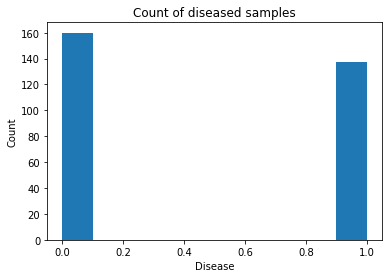

In [4]:
data_binary_n = data_binary.values
print(data_binary_n.shape)

X_binary = data_binary_n[:,:-1]
y_binary = data_binary_n[:,-1]
y_binary = y_binary.reshape(len(y_binary), 1)
print(X_binary.shape)
print(y_binary.shape)

plt.title("Count of diseased samples")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.hist(y_binary)

In [5]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean= np.mean(X,axis=0)
    std= np.std(X,axis=0)
    
    X_norm = (X-mean)/std
    
    return X_norm , mean , std

In [6]:
X_binary_norm, X_binary_mean, X_binary_std = featureNormalization(X_binary)
print(X_binary_norm.shape)

(297, 13)


In [7]:
def sigmoid(z):
    """
    return the sigmoid of z
    """

    gz=1/(1+np.exp(-z))
    
    return gz

In [8]:
 def costFunctionReg(X, y, theta, Lambda):
    """
    Take in numpy array of  data X, labels y and theta, to return the regularized cost function and gradients
    of the logistic regression classifier
    """
    
    #number of training examples 
    m=len(y)
        
    #vector of the model predictions for all training examples      
    h = sigmoid(np.dot(X, theta))
    
    error = (-y * np.log(h)) - ((1-y)*np.log(1-h))
    
    #cost function without regularization term
    cost = sum(error)/m
    
    #add regularization term to the cost function
    regCost= cost + Lambda/(2*m) * sum(theta[1:]**2)
    
    #gradient of theta_0
    grad_0= (1/m) * np.dot(X.transpose(),(h - y))[0]
    
    #vector of gradients of theta_j from j=1:n (adding the regularization term of the gradient)
    grad = (1/m) * np.dot(X.transpose(),(h - y))[1:] + (Lambda/m)* theta[1:]
       
    # all gradients in a column vector shape
    grad_all=np.append(grad_0,grad)
    grad_all = grad_all.reshape((len(grad_all), 1))
    
    return regCost[0], grad_all

In [9]:
initial_theta_binary = np.zeros((X_binary_norm.shape[1],1))
print(initial_theta_binary.shape)

Lambda = 0

cost, grad = costFunctionReg(X_binary_norm, y_binary, initial_theta_binary, Lambda)

print("Cost for initial theta is",round(cost,3) )

(13, 1)
Cost for initial theta is 0.693


In [10]:
def gradientDescent(X, y, theta, alpha, num_iters, Lambda):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    J_history =[]
    
    for i in range(num_iters):
        
        #call CostFunctionReg 
        cost, grad = costFunctionReg(X, y, theta, Lambda)
        
        #update theta
        theta = theta - (alpha*grad)
        
        J_history.append(cost)
    
    return theta , J_history

In [11]:
Lambda = 10
alpha = 0.5
iterat = 200
initial_theta_binary = np.zeros((X_binary_norm.shape[1],1))
theta , J_history = gradientDescent(X_binary_norm, y_binary, initial_theta_binary, alpha, iterat, Lambda)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

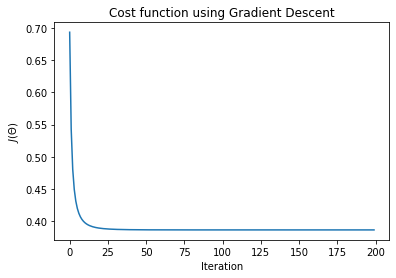

In [12]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [13]:
def classifierAccuracy(X, y, theta):
    """
    take in numpy array of X, y and theta, and compute the accuracy of the classifier 
    """
    h = np.dot(X, theta)
    
    acc = (sum((h>0)==y)/len(y)*100)[0]
    
    return acc

In [14]:
acc = classifierAccuracy(X_binary_norm, y_binary, theta)

print("Train Accuracy:", acc, "%") 

Train Accuracy: 84.51178451178451 %


In [15]:
def classifierPredict(X, theta):
    """
    take in numpy array of X and theta, and predict the class
    """
    prob = sigmoid(np.dot(X_binary_test, theta))
    
    if prob[0] > 0.5:
        predClass = 1
    else:
        predClass = 0
    
    return predClass

In [16]:
X_binary_test = np.array([62.0,1.0,4.0,130.0,254.0,0.0,2.5,147.0,0.0,0.4,2.0,1.0,7.0])
X_binary_test = X_binary_test.reshape(1, len(X_binary_test))

#Normalize the values
X_binary_test = (X_binary_test - X_binary_mean)/X_binary_std

#Compute the prediction (the probability for admission)
prob = classifierPredict(X_binary_test, theta)
print("Predicted class: ", prob)


Predicted class:  1
